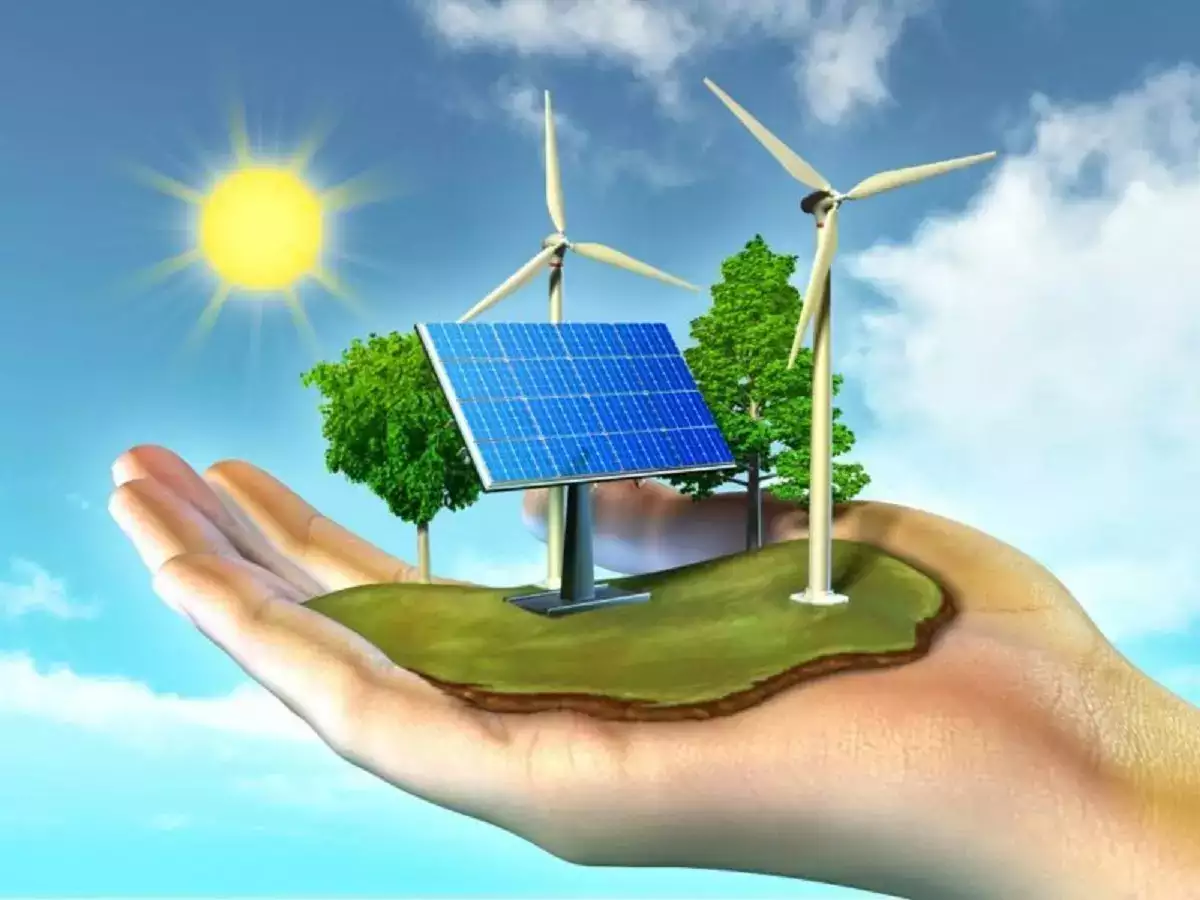

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('database_IND.csv')

In [10]:
print('No of Rows :', df.shape[0])
print('No of Columns :', df.shape[1])
df.head()


No of Rows : 907
No of Columns : 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [11]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# 

# Statiscal Analysis

##### let check if any whitespace,'?''NA' or '-'exist in dataset

In [13]:
df.isin([' ','NA', '-','?']).sum().any()

False

In [14]:
df.duplicated().sum()

0

### Missing value check

In [15]:
df.drop(columns=['country', 'country_long','url', 'year_of_capacity_data', 'gppd_idnr', 'owner', 'other_fuel3', 'other_fuel2','estimated_generation_gwh','wepp_id'],axis=1, inplace=True)

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                        Missing Values  %Missing data
generation_gwh_2019                907     100.000000
generation_gwh_2013                907     100.000000
other_fuel1                        709      78.169791
generation_gwh_2014                509      56.119074
generation_gwh_2015                485      53.472988
generation_gwh_2016                473      52.149945
generation_gwh_2017                467      51.488423
generation_gwh_2018                459      50.606395
generation_data_source             458      50.496141
commissioning_year                 380      41.896362
latitude                            46       5.071665
longitude                           46       5.071665
geolocation_source                  19       2.094818
capacity_mw                          0       0.000000
source                               0       0.000000
primary_fuel                         0       0.000000
name                                 0       0.000000


# 

## Missing value Impuatation

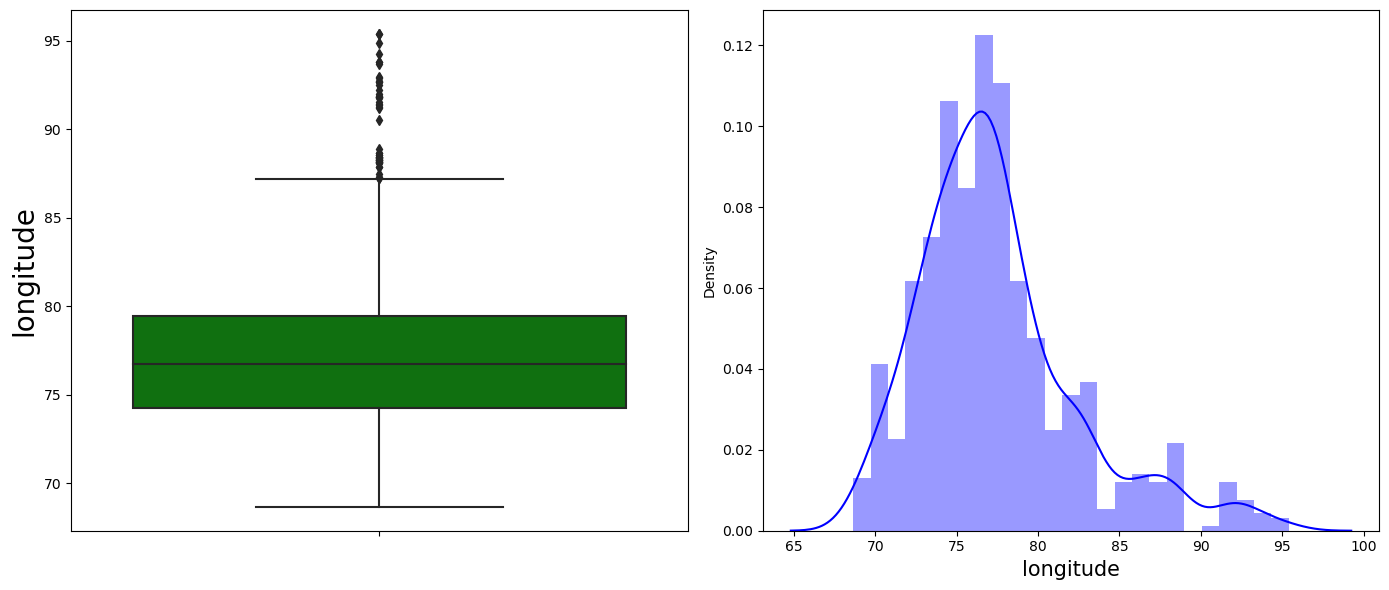

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='longitude', data=df, color='g')
plt.ylabel('longitude', fontsize=20)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color= 'b')
plt.xlabel('longitude', fontsize=15)
plt.tight_layout()
plt.show()

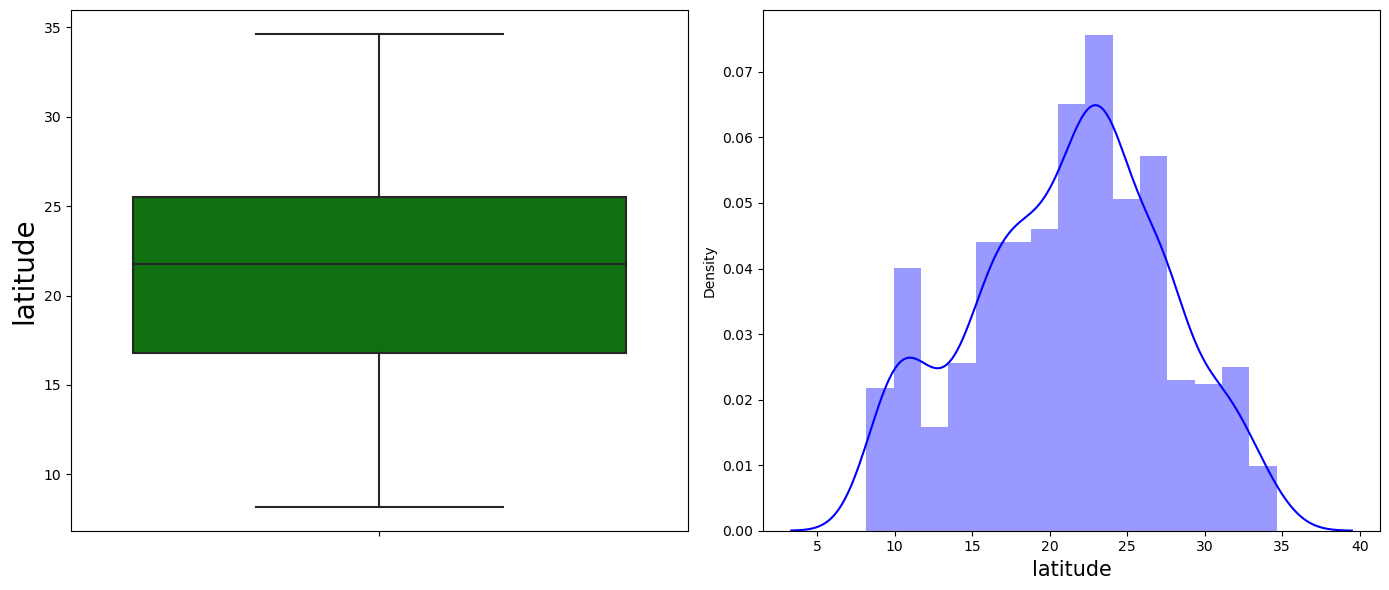

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='latitude', data=df, color='g')
plt.ylabel('latitude', fontsize=20)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color= 'b')
plt.xlabel('latitude', fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

df['longitude'] = df['longitude'].fillna(df['longitude'].median())

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [20]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                        Missing Values  %Missing data
generation_gwh_2019                907     100.000000
generation_gwh_2013                907     100.000000
other_fuel1                        709      78.169791
generation_gwh_2014                509      56.119074
generation_gwh_2015                485      53.472988
generation_gwh_2016                473      52.149945
generation_gwh_2017                467      51.488423
generation_gwh_2018                459      50.606395
generation_data_source             458      50.496141
commissioning_year                 380      41.896362
name                                 0       0.000000
capacity_mw                          0       0.000000
source                               0       0.000000
primary_fuel                         0       0.000000
longitude                            0       0.000000
latitude                             0       0.000000
geolocation_source                   0       0.000000


## 

## Statiscal Matrix

In [21]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [22]:
df.drop(['generation_gwh_2013', 'generation_gwh_2019'], axis=1, inplace=True)

## 

## Regression Target feature- Capacity

In [23]:
print('Minimum Capacity of powerplant:' ,df.capacity_mw.min())
print('Maximum Capacity of powerplant:' ,df.capacity_mw.max())

Minimum Capacity of powerplant: 0.0
Maximum Capacity of powerplant: 4760.0


In [24]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [25]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


# 

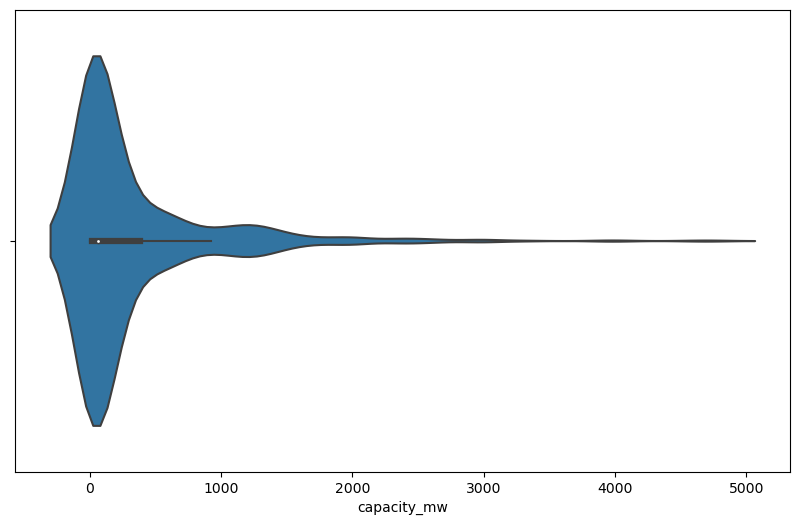

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [27]:
df.loc[df.capacity_mw>1500].shape

(39, 15)

In [28]:
pd.crosstab(df['capacity_mw'],df['primary_fuel'], margins=True).T.style.background_gradient(cmap= 'summer_r')

Text(0.5, 0, 'primary_fuel')

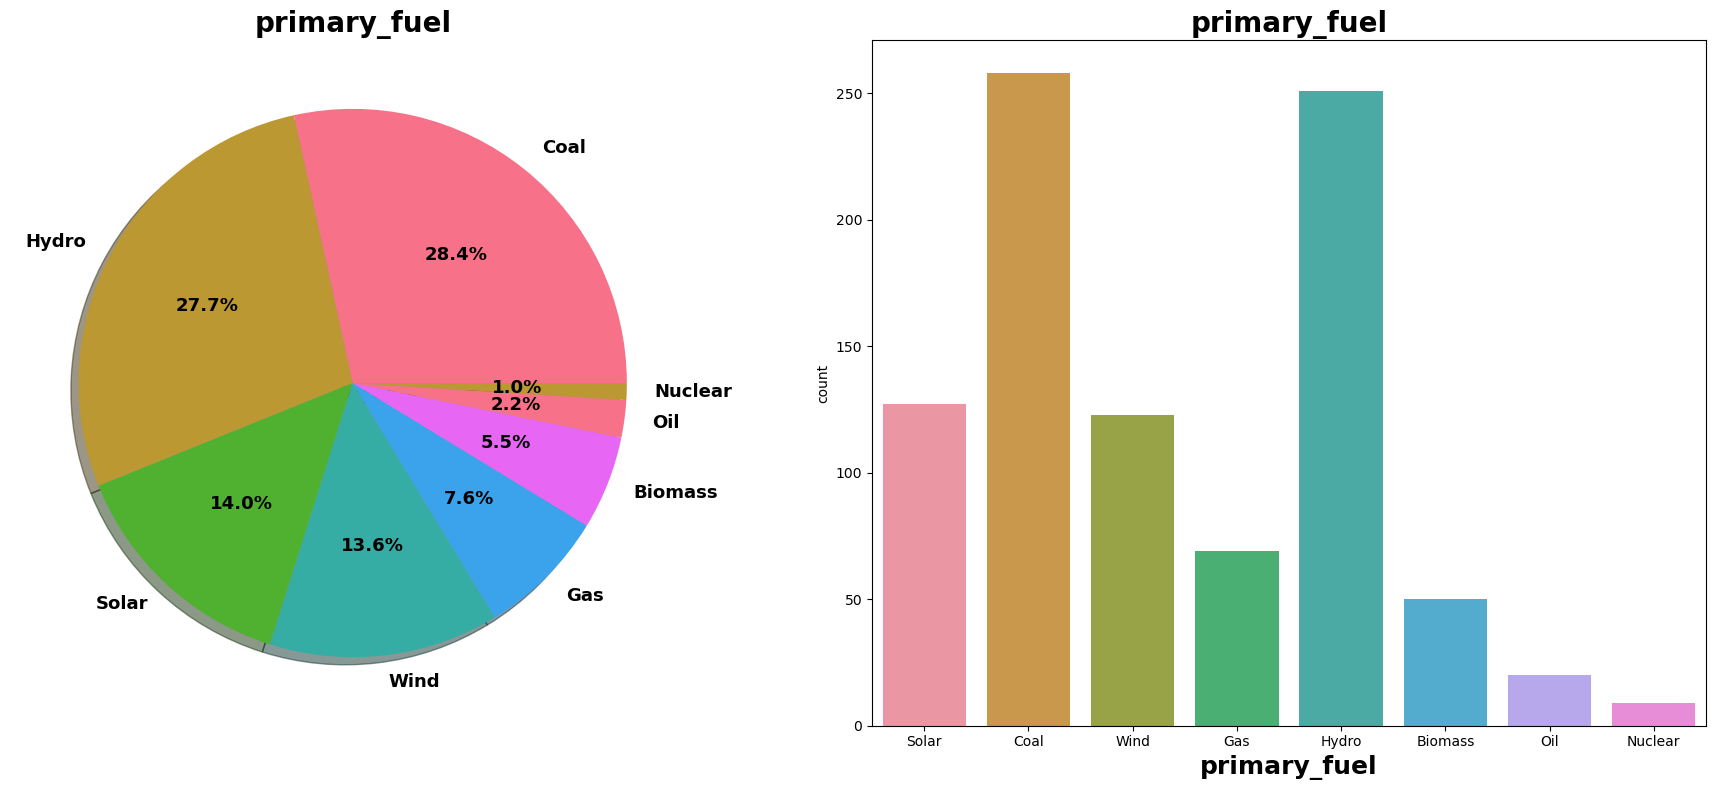

In [29]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('husl')
f,ax= plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontweight' : 'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20, fontweight = 'bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel', data=df, ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20, fontweight='bold')
ax[1].set_xlabel('primary_fuel', fontsize=18, fontweight='bold')

In [30]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [31]:
print('Total power generation capacity of all power plants :',df['capacity_mw'].sum(),'MW')

Total power generation capacity of all power plants : 295884.946 MW


In [32]:
df['capacity_mw'].groupby(df['primary_fuel']).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


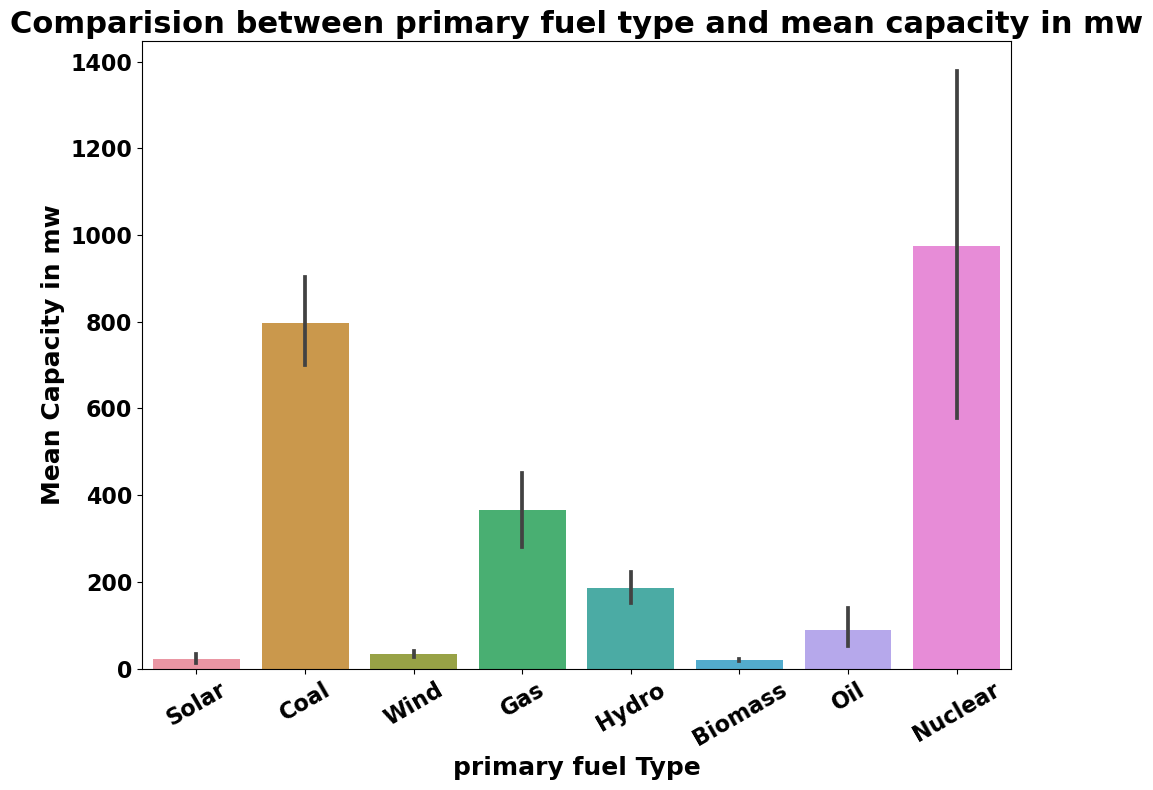

In [33]:
plt.figure(figsize = (10,8))
y = df['capacity_mw']
p = sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data=df)
plt.title('Comparision between primary fuel type and mean capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('primary fuel Type', fontsize=18, fontweight='bold')
p.set_ylabel('Mean Capacity in mw', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight ='bold', rotation= 30)
plt.yticks(fontsize =16, fontweight= 'bold')
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

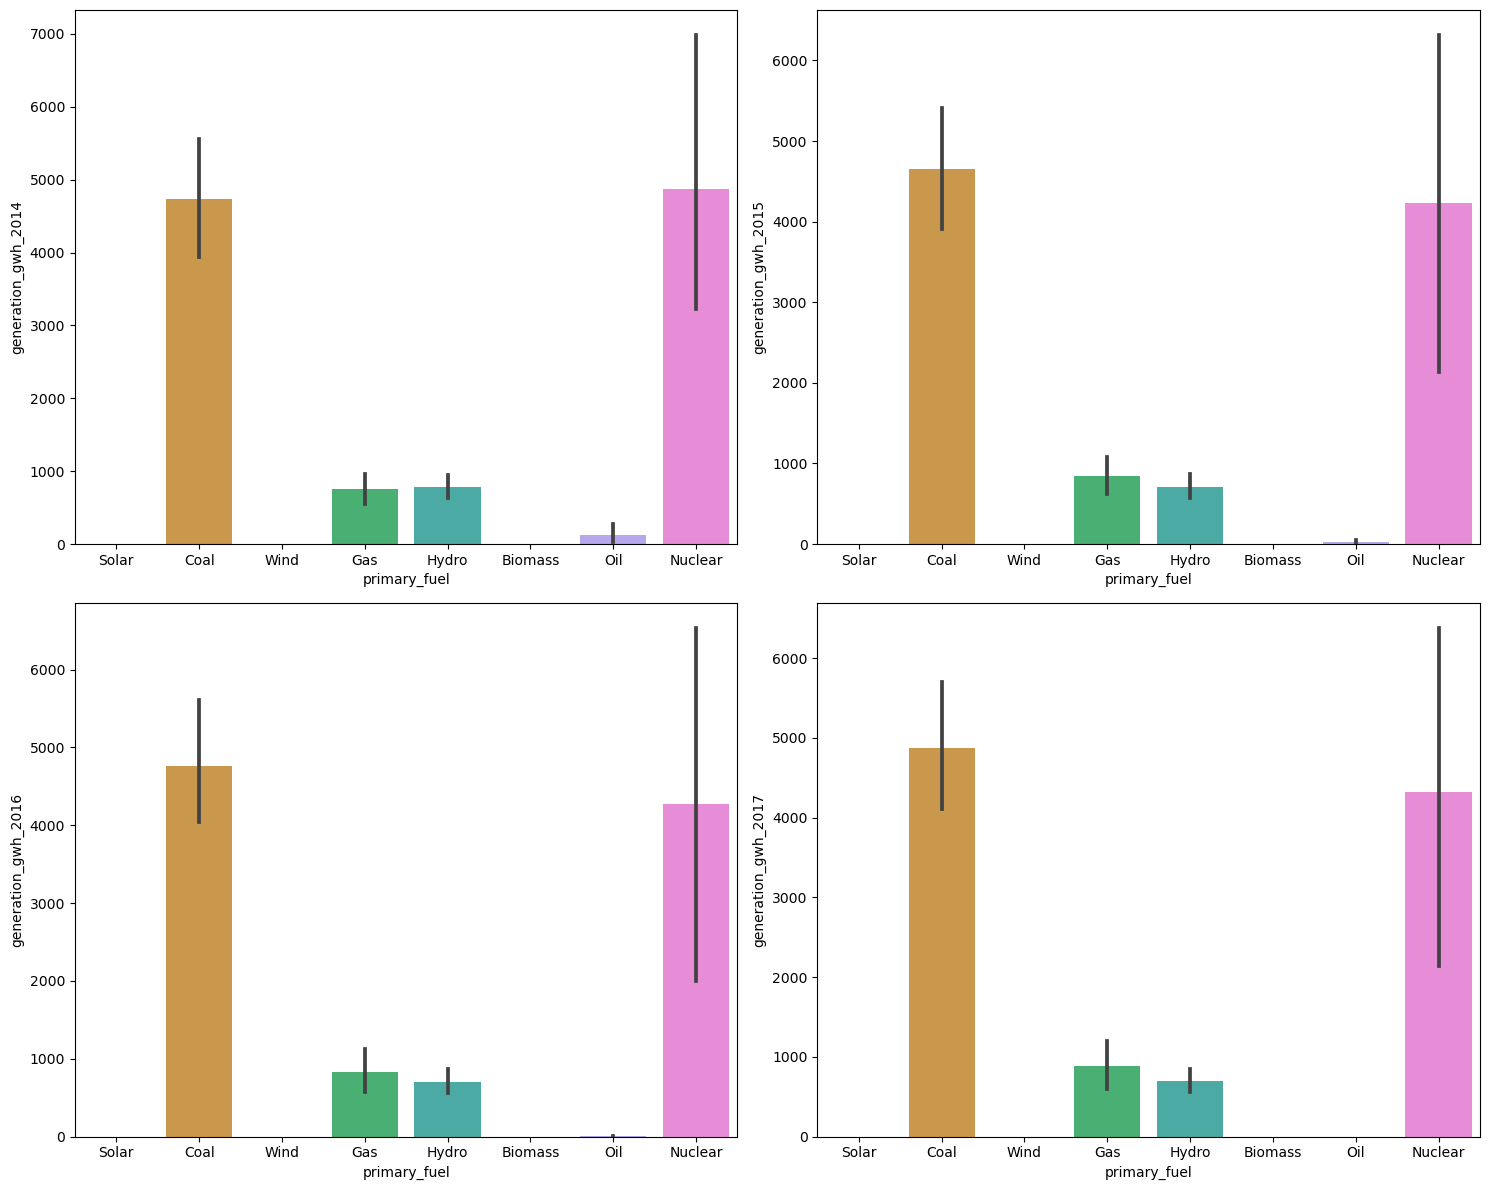

In [34]:
fig,axes = plt.subplots(2,2,figsize=(15,12))

sns.barplot(x='primary_fuel', y='generation_gwh_2014', ax=axes[0,0], data=df)

sns.barplot(x='primary_fuel', y='generation_gwh_2015', ax=axes[0,1], data=df)

sns.barplot(x='primary_fuel', y='generation_gwh_2016', ax=axes[1,0], data=df)

sns.barplot(x='primary_fuel', y='generation_gwh_2017', ax=axes[1,1], data=df)


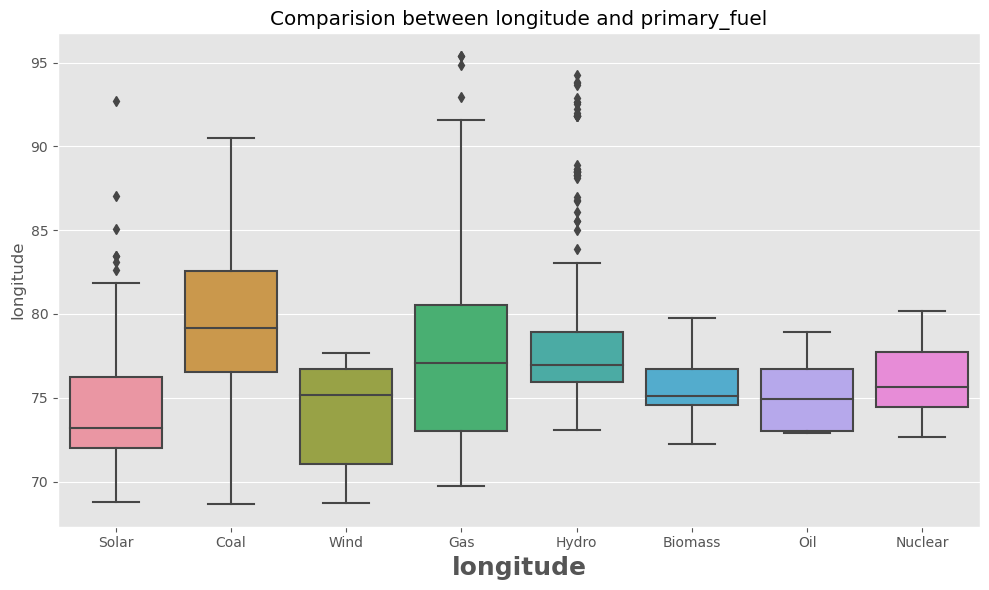

In [35]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a= sns.boxplot(df['primary_fuel'], df['longitude'])
a.set_xlabel('Parimary fuel Type', fontsize=18, fontweight = 'bold')
a.set_xlabel('longitude', fontsize=18, fontweight = 'bold')
plt.show()

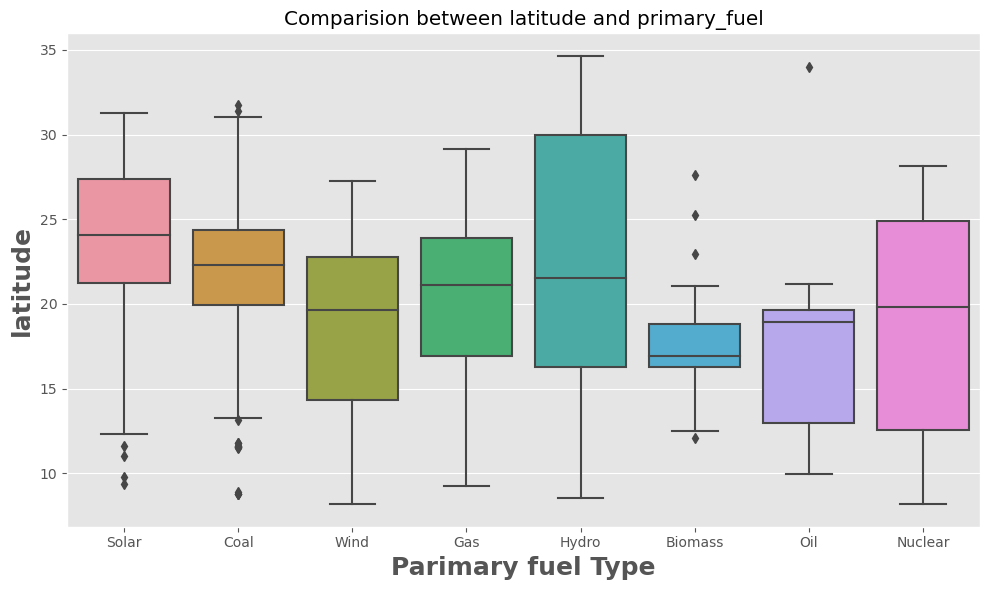

In [36]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and primary_fuel')
a= sns.boxplot(df['primary_fuel'], df['latitude'])
a.set_xlabel('Parimary fuel Type', fontsize=18, fontweight = 'bold')
a.set_ylabel('latitude', fontsize=18, fontweight = 'bold')
plt.show()

### Location vs Capacity

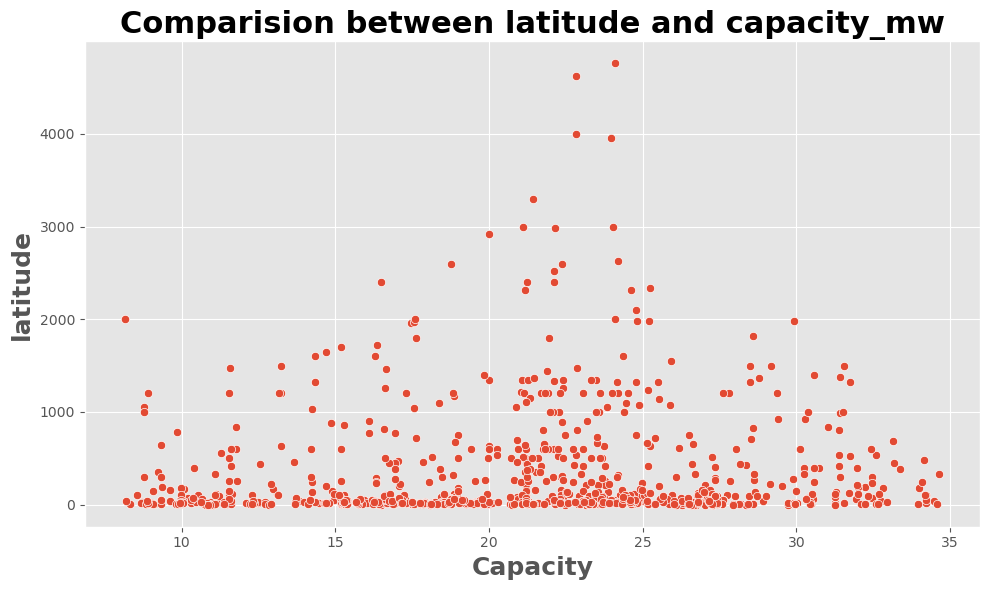

In [37]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw', fontsize=22 , fontweight= 'bold')
a= sns.scatterplot(df['latitude'], df['capacity_mw'])
a.set_xlabel('Capacity', fontsize=18, fontweight = 'bold')
a.set_ylabel('latitude', fontsize=18, fontweight = 'bold')
plt.show()

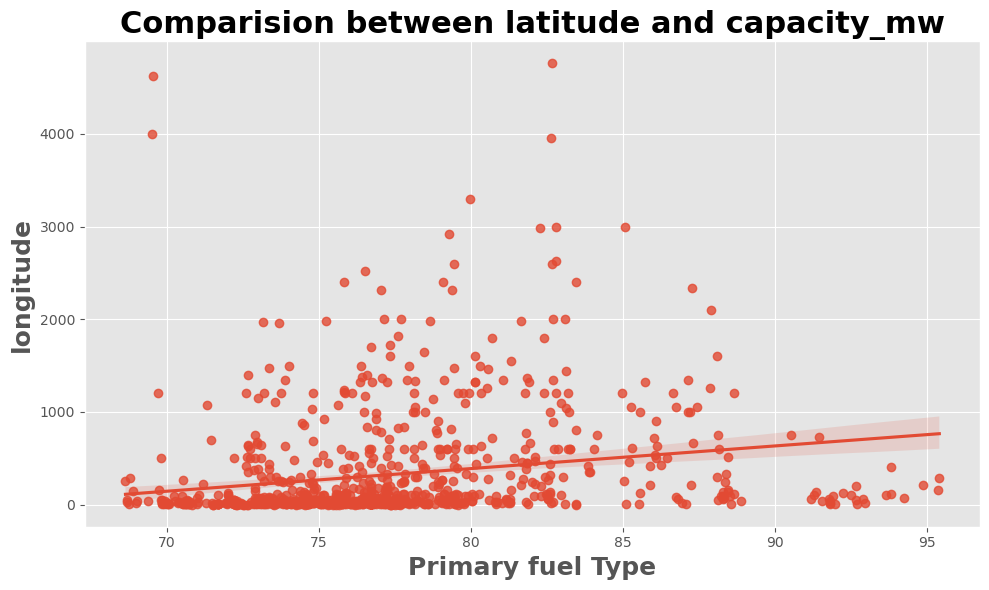

In [38]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw', fontsize=22 , fontweight= 'bold')
a= sns.regplot(df['longitude'], df['capacity_mw'])
a.set_xlabel('Primary fuel Type', fontsize=18, fontweight = 'bold')
a.set_ylabel('longitude', fontsize=18, fontweight = 'bold')
plt.show()

### Commission age vs primary fuel

In [39]:
df['Power_plant_age'] = 2018-df['commissioning_year']
df.drop(columns=['commissioning_year'], inplace=True)

In [40]:
print('The oldest powerplant Age :', df.Power_plant_age.max())
print('The youngest powerplant Age :', df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [41]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


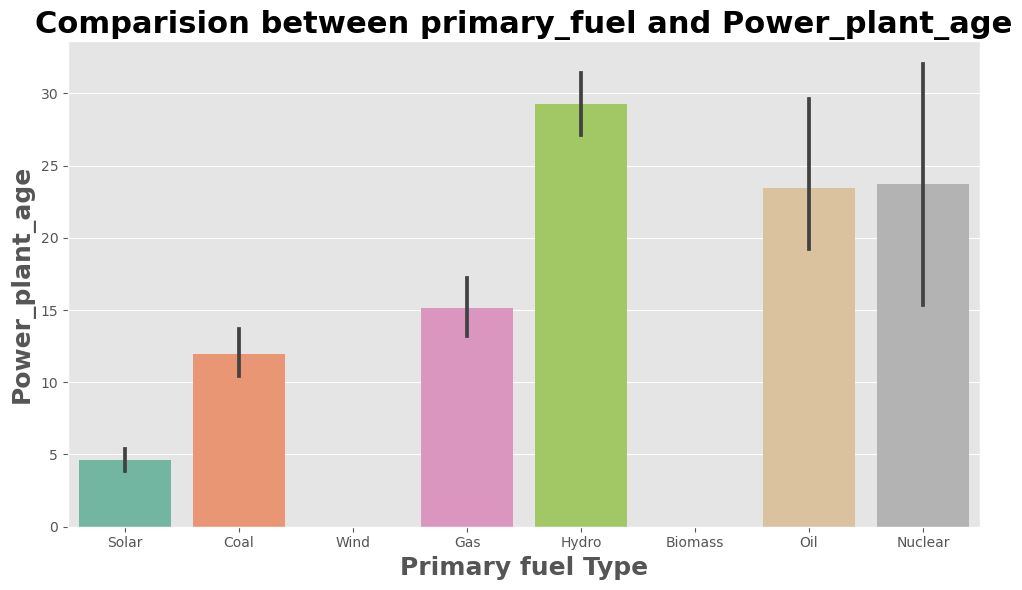

In [42]:
plt.figure(figsize=[10,6])
plt.title('Comparision between primary_fuel and Power_plant_age', fontsize=22 , fontweight= 'bold')
a= sns.barplot(x='primary_fuel',y= 'Power_plant_age',data= df, palette='Set2')
a.set_xlabel('Primary fuel Type', fontsize=18, fontweight = 'bold')
a.set_ylabel('Power_plant_age', fontsize=18, fontweight = 'bold')
plt.show()

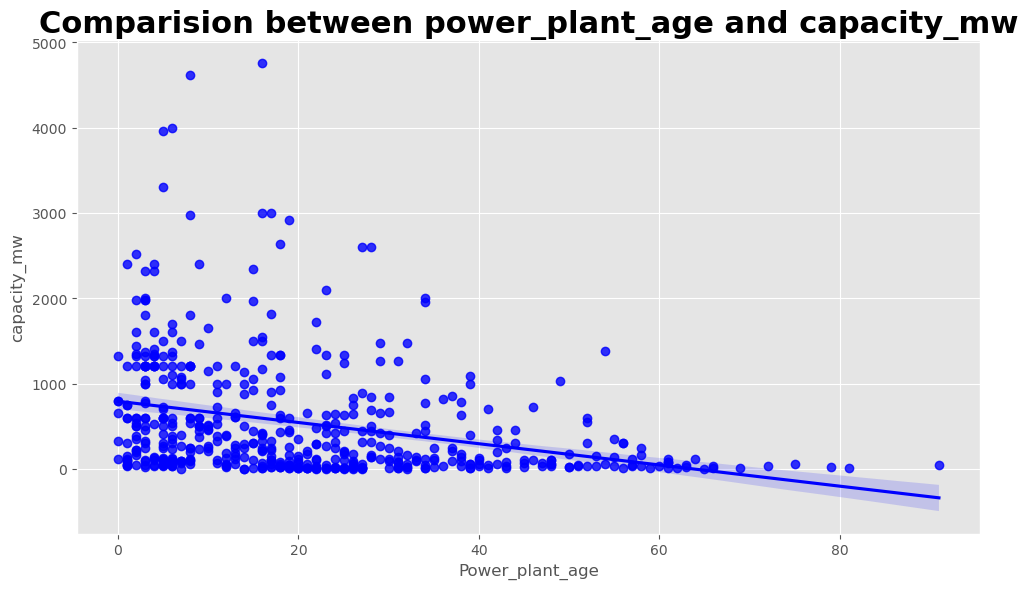

In [43]:
plt.figure(figsize=[10,6])
plt.title('Comparision between power_plant_age and capacity_mw', fontsize=22 , fontweight= 'bold')
a= sns.regplot(df['Power_plant_age'], df['capacity_mw'], color= 'b')

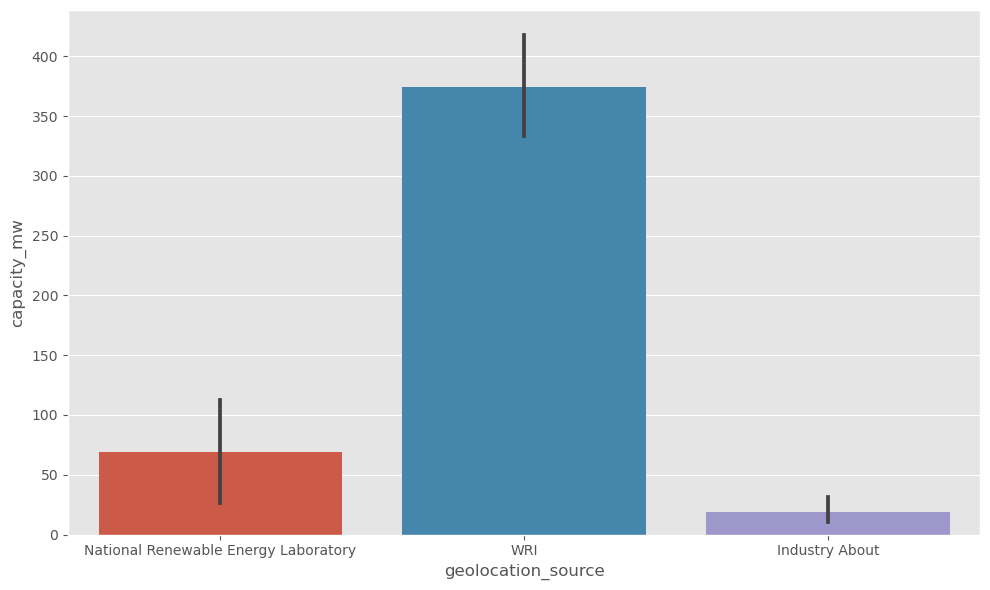

In [44]:
plt.figure(figsize= (10,6))
sns.barplot(x='geolocation_source', y= 'capacity_mw', data=df)
plt.show()

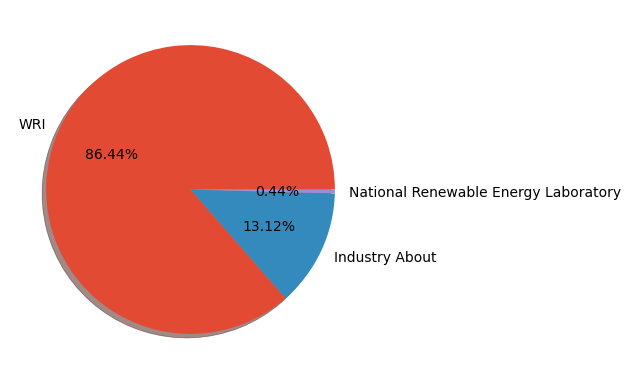

In [45]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

## Distribution of features

In [46]:
Numerical= ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

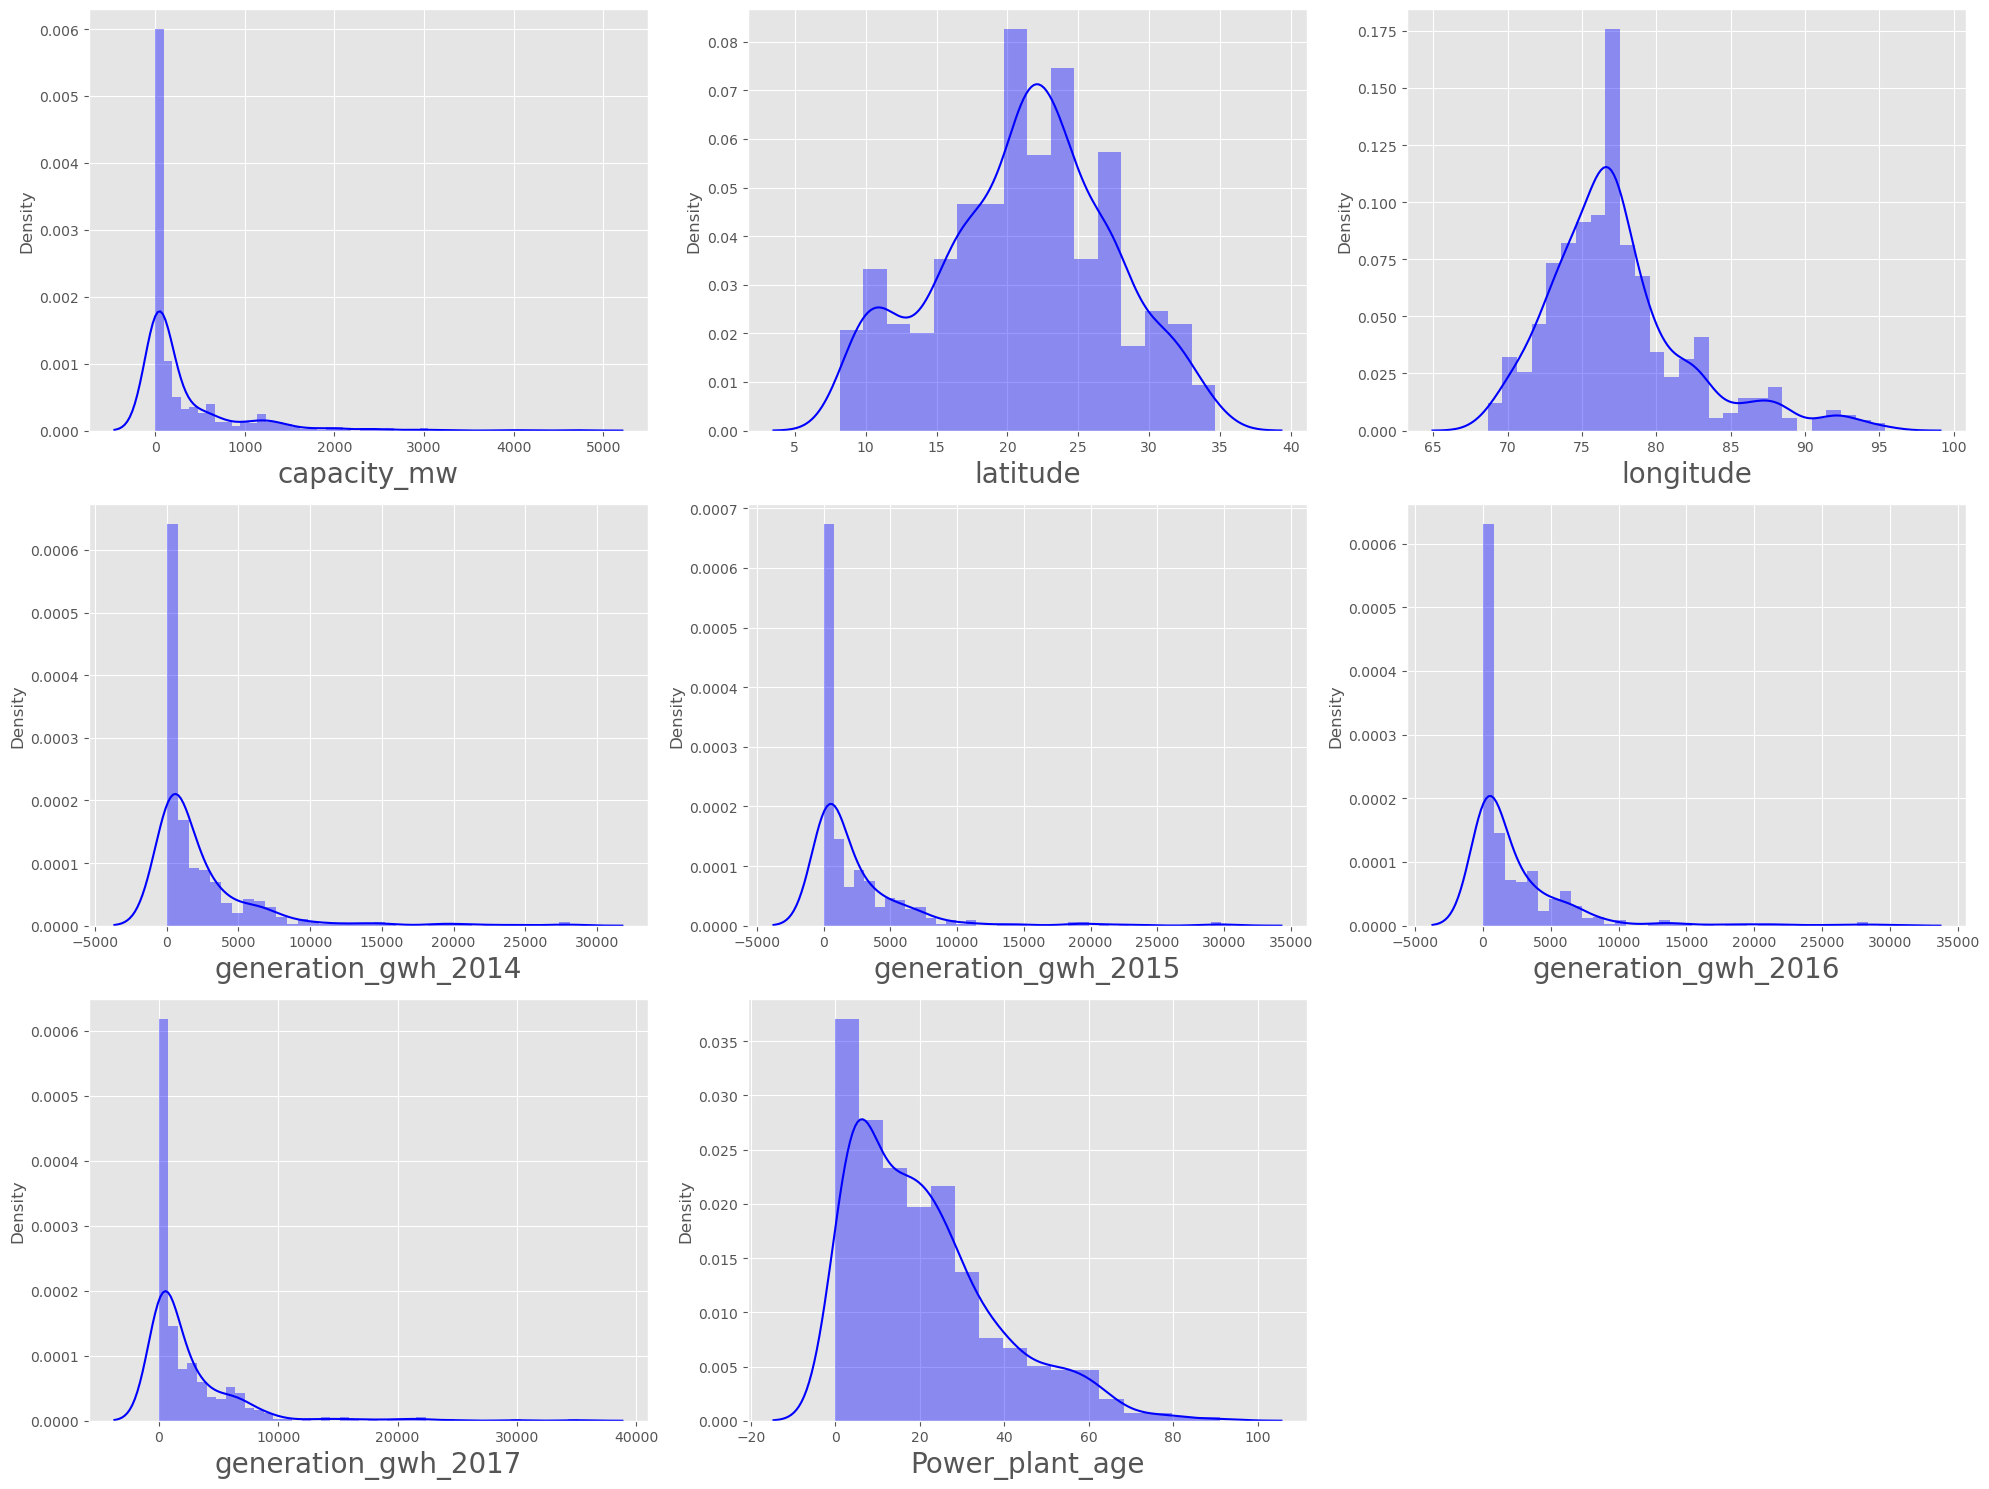

In [47]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

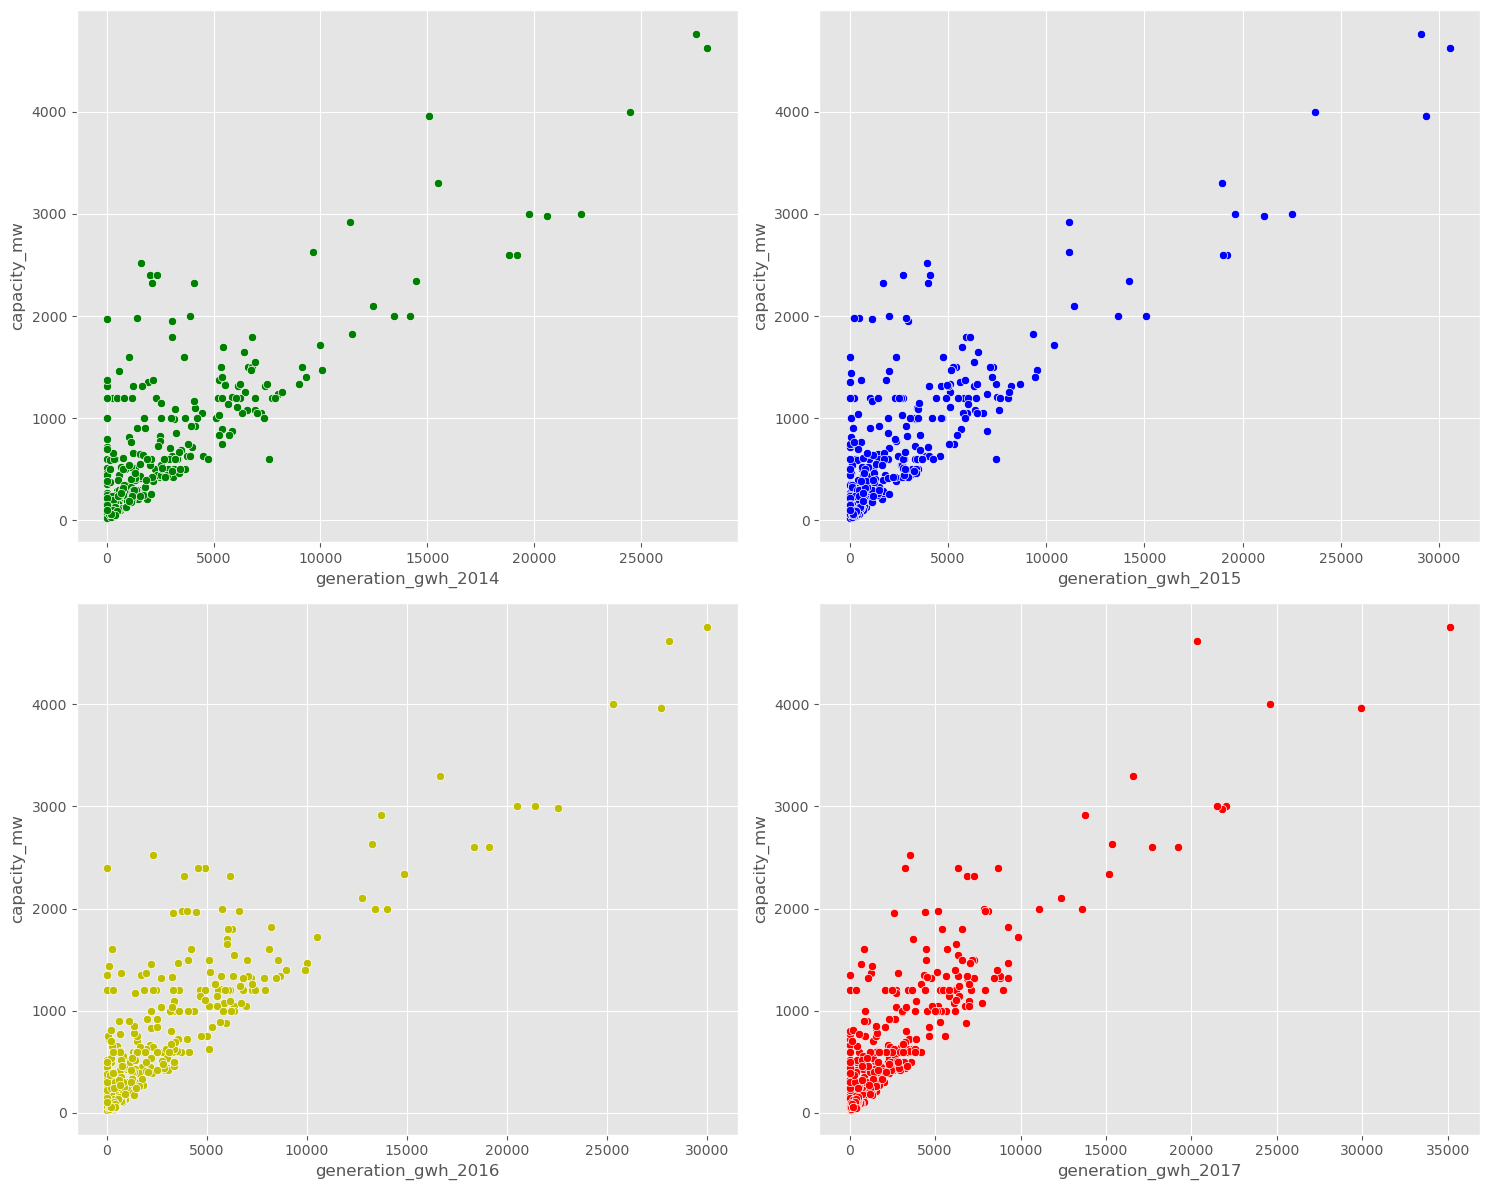

In [48]:
fig,axes = plt.subplots(2,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2014',y='capacity_mw', ax=axes[0,0], data=df, color='g')

sns.scatterplot(x='generation_gwh_2015',y='capacity_mw', ax=axes[0,1], data=df, color='b')

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw', ax=axes[1,0], data=df, color='y')

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw', ax=axes[1,1], data=df, color='r')


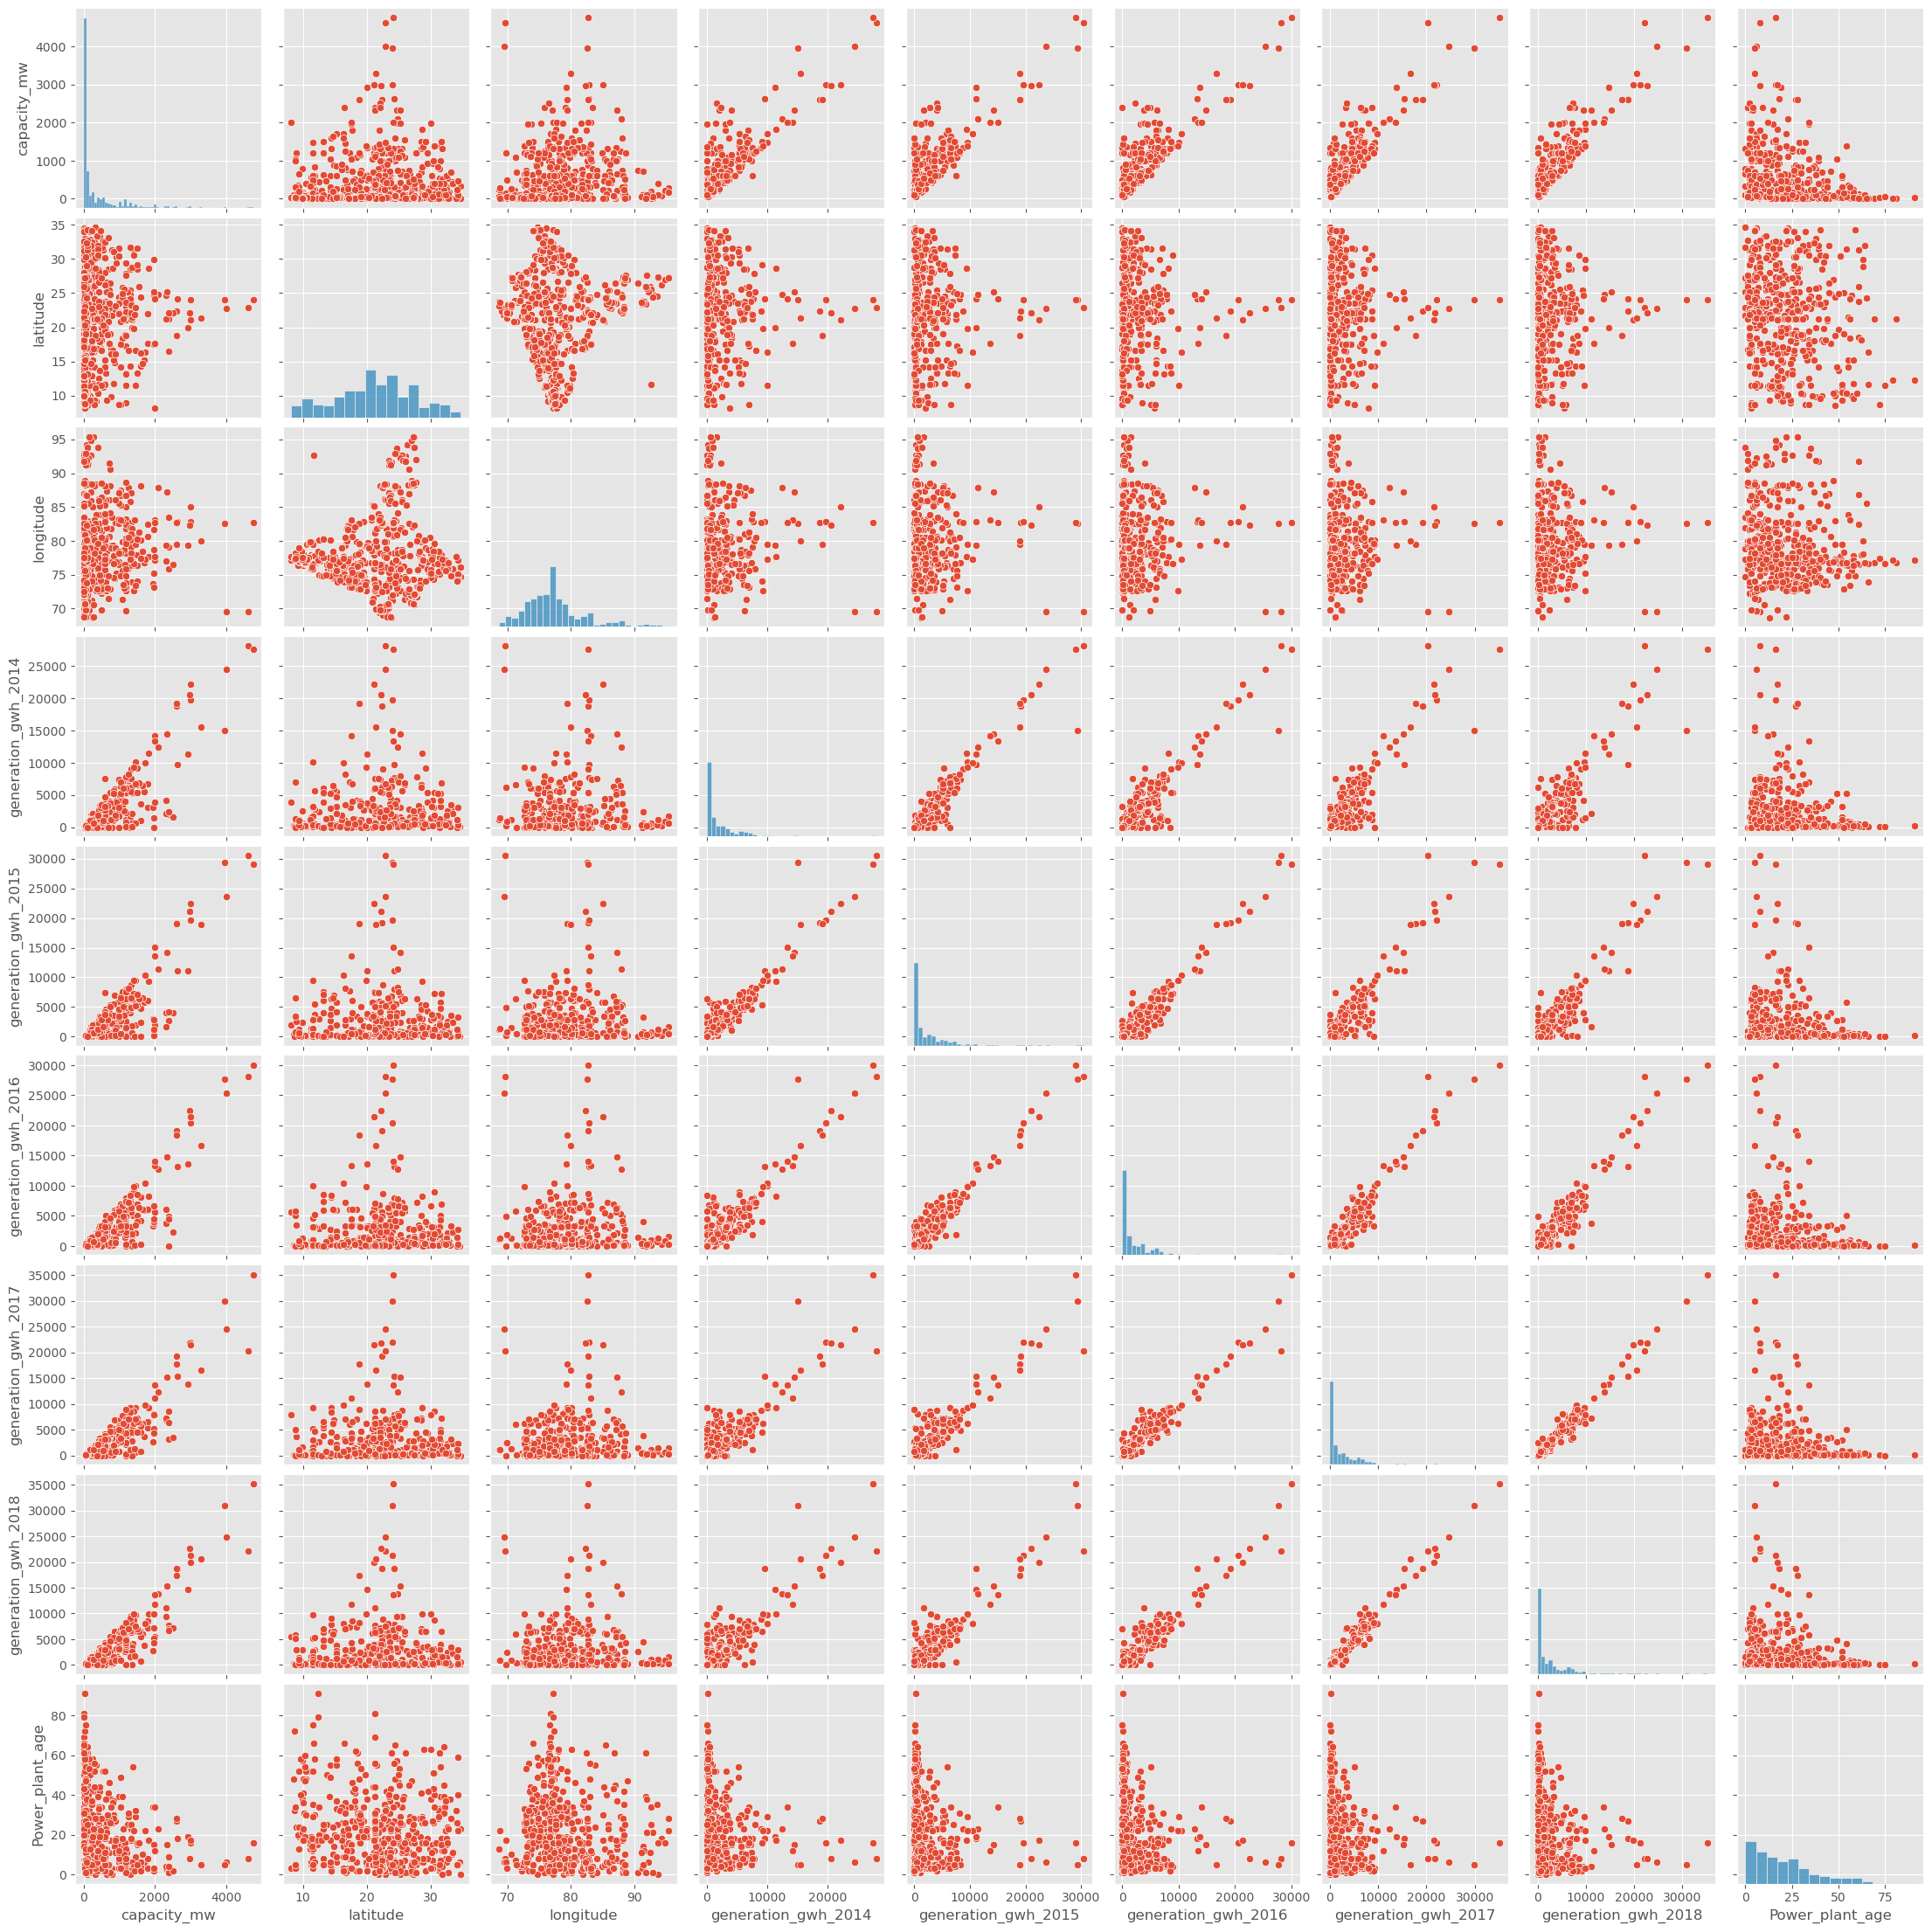

In [49]:
sns.pairplot(df)

# 

## Encoding categorical data

In [50]:
df.drop(columns=['name'], axis=1, inplace=True)

In [51]:
df.drop(columns=['generation_data_source'], axis=1, inplace=True)

In [52]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [53]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


## Outliers detection and removal

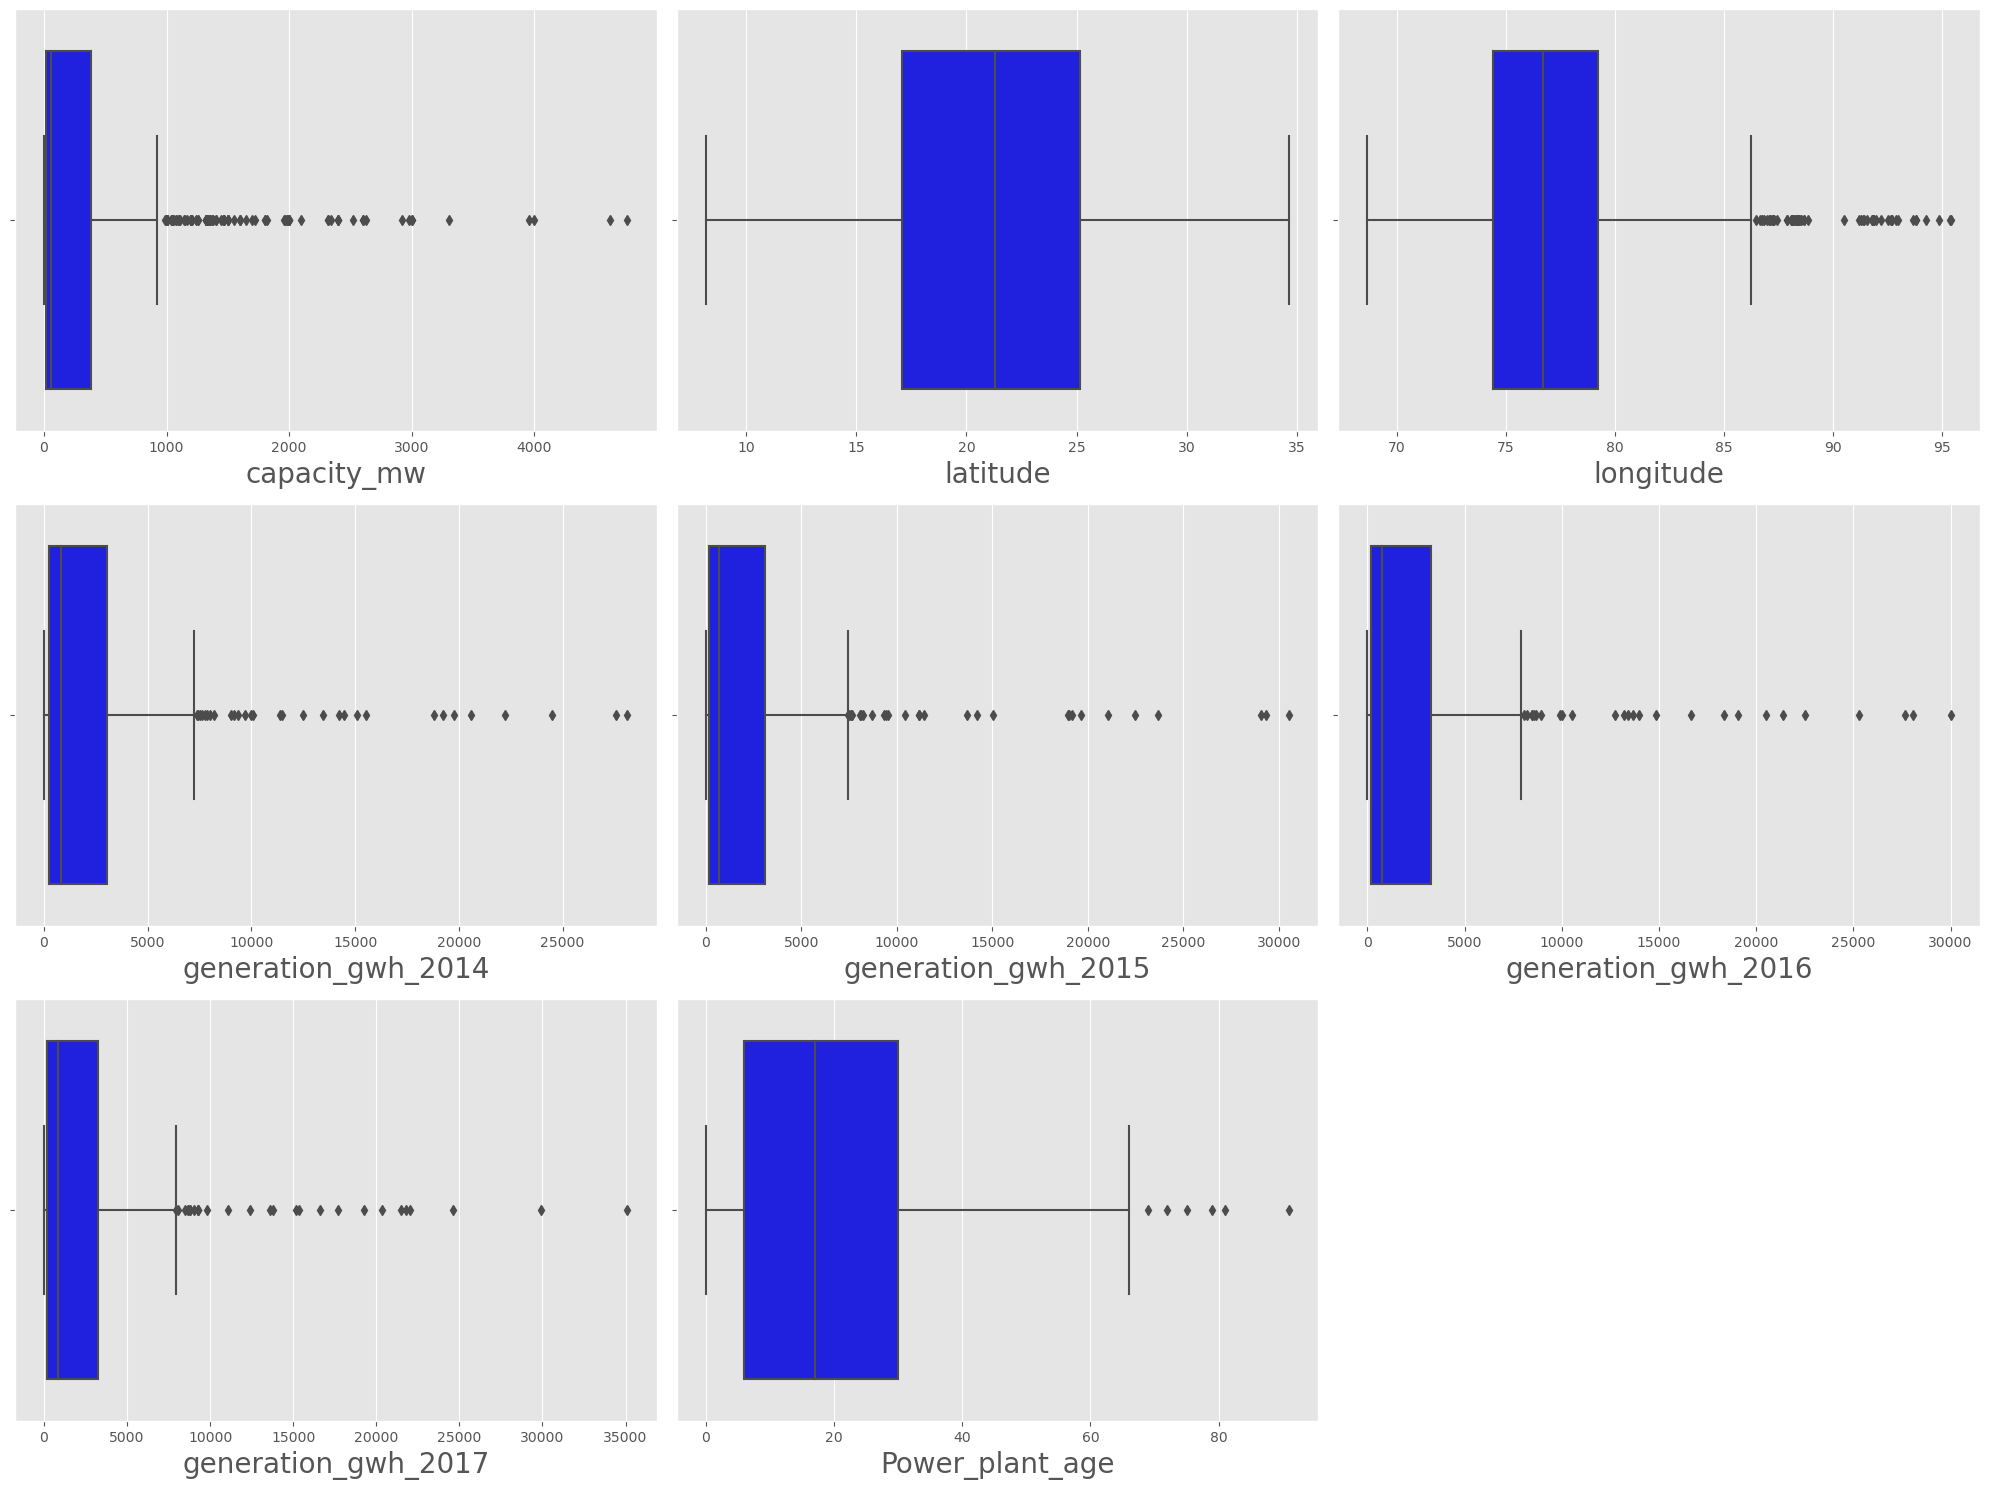

In [54]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [55]:
df.drop(columns=['source', 'geolocation_source'],axis= 1,inplace=True)

In [56]:
df2=df.copy

In [57]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3 = df3.quantile(0.85)

IQR = Q3-Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [58]:
data = df3[~((df3 < (Q1 -1.5*IQR)) |(df3 > (Q3 + 1.5*IQR))). any(axis=1)]
print(data.shape)

(877, 11)


# 

### Data Loss

In [59]:
print('\033[1m'+'Percentage Data Loss :'+'\033[0m', ((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


## Correlation matrix

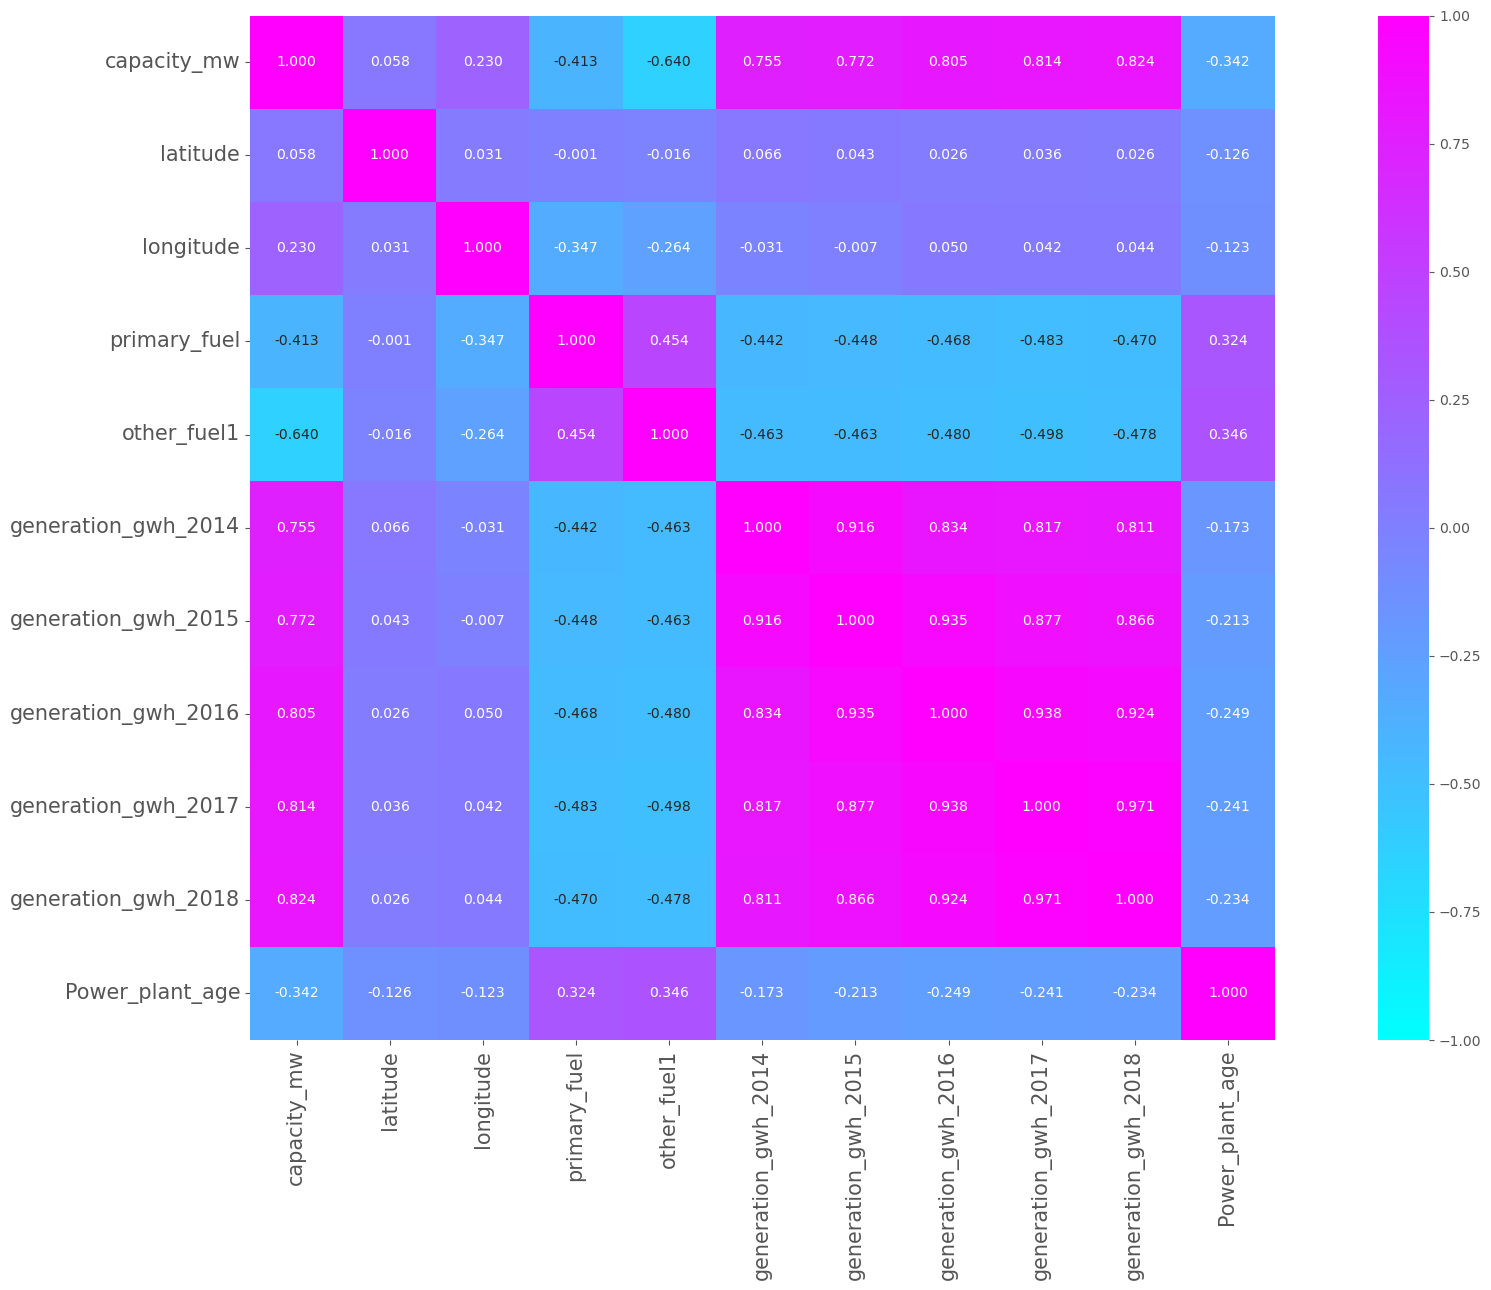

In [60]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',annot_kws={'size':10}, cmap='cool')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

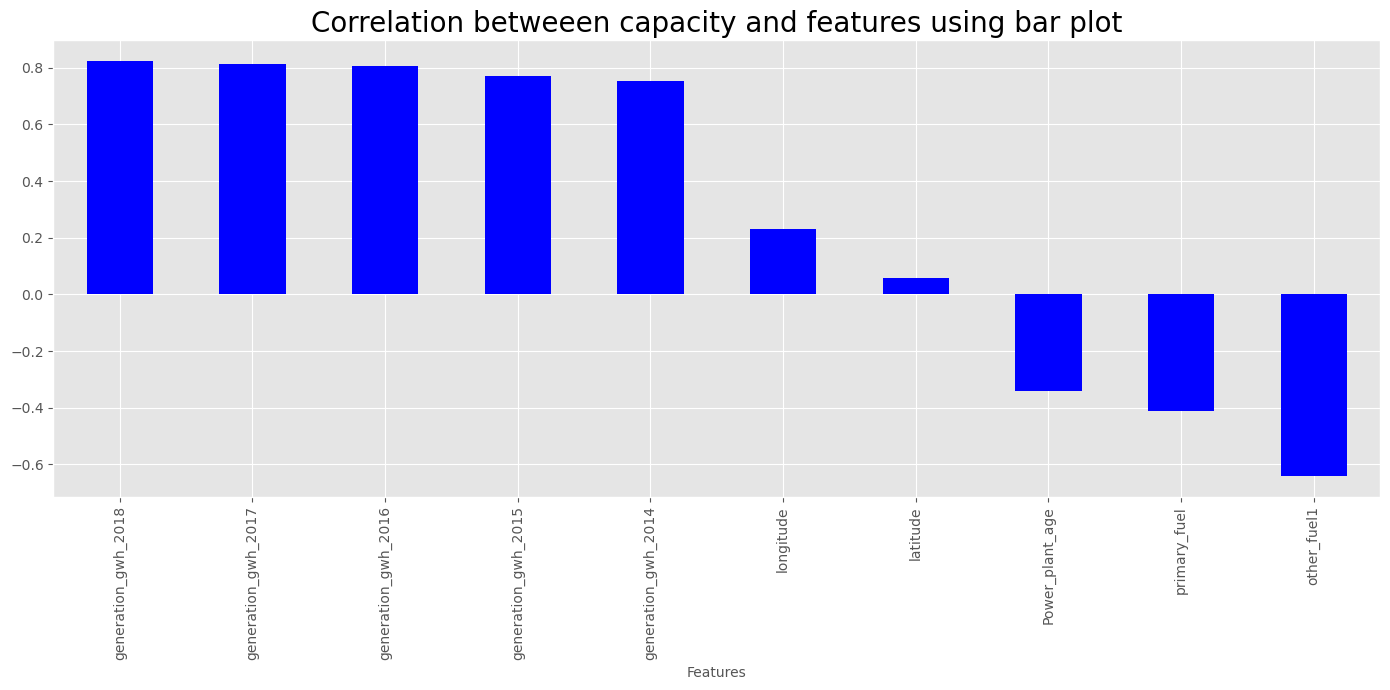

In [61]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='b')
plt.xlabel('Features', fontsize=10)
plt.xlabel('Features', fontsize=10)
plt.title('Correlation betweeen capacity and features using bar plot', fontsize=20)
plt.show()

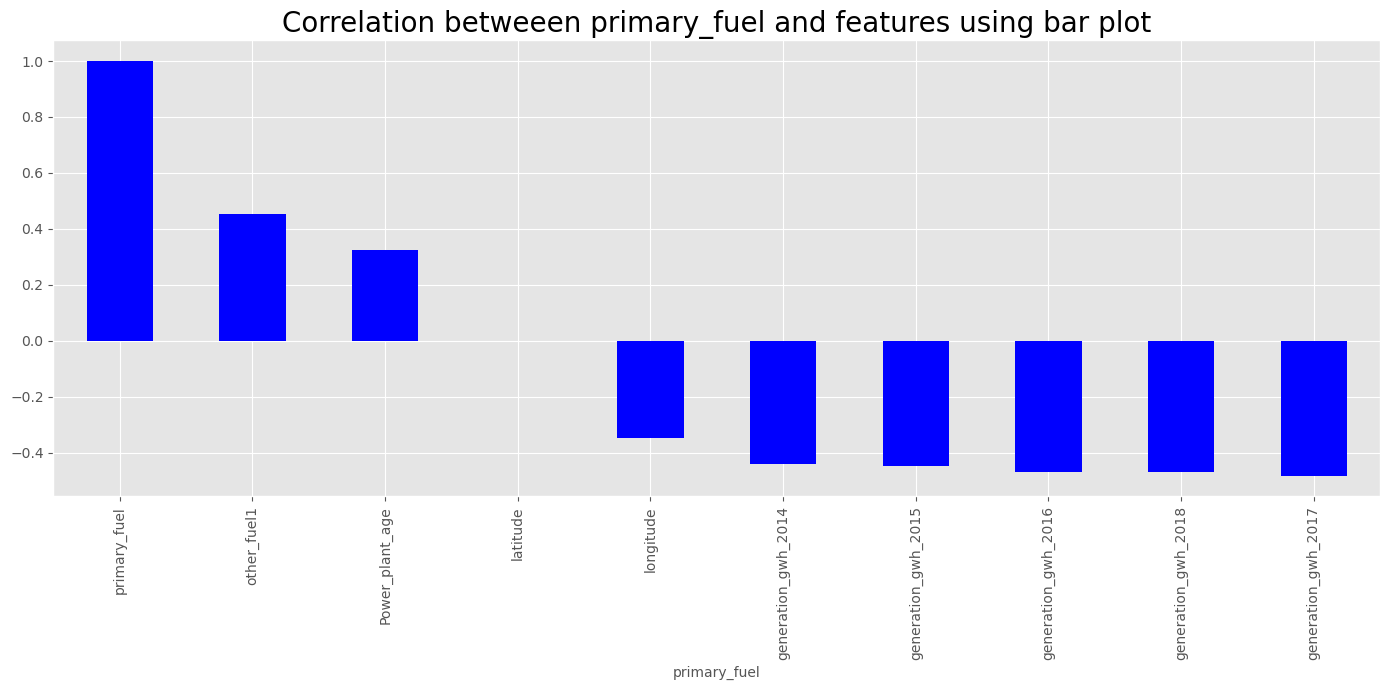

In [62]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='b')
plt.xlabel('Features', fontsize=10)
plt.xlabel('primary_fuel', fontsize=10)
plt.title('Correlation betweeen primary_fuel and features using bar plot', fontsize=20)
plt.show()

# Skewness

In [63]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [64]:
skew = ['longitude', 'other_fuel1', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [65]:
data[skew]= scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,-1.370997


In [66]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018    1.532123
Power_plant_age       -0.075616
dtype: float64

In [67]:
data.drop('other_fuel1', axis=1, inplace=True)
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

# EDA 

In [68]:
data.drop('generation_gwh_2018', axis=1,inplace=True)
data.drop('generation_gwh_2014', axis=1,inplace=True)
data.drop('generation_gwh_2015', axis=1,inplace=True)
data.drop('generation_gwh_2016', axis=1,inplace=True)
data.drop('generation_gwh_2017', axis=1,inplace=True)

# 

# Machine Learnings Model Building

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

## Standard scaling 

In [70]:
X = data.drop(['primary_fuel'], axis = 1)
Y = data['primary_fuel']

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training feature matrix size:', x_train.shape)
print('Training target vector size:', y_train.shape)
print('Test feature matrix size:', x_test.shape)
print('Test target vector size:', y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


# 

## finding best Random state

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


# Logistics Regression Model

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26      

## Decision Tree Classifier

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6666666666666666


Confusion matrix of Logistics Regression : 
 [[ 6  2  0  0  0  0  1  3]
 [ 1 41  5 13  0  3  4  2]
 [ 0  3  5  7  0  2  0  1]
 [ 0  5  6 61  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 2  3  0  0  0  0 33  2]
 [ 2  2  1  0  0  0 10 29]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.69      0.59      0.64        69
           2       0.25      0.28      0.26        18
           3       0.73      0.85      0.79        72
           4       0.00      0.00      0.00         4
           5       0.17      0.20      0.18         5
           6       0.69      0.82      0.75        40
           7       0.78      0.66      0.72        44

    accuracy                           0.67       264
   macro avg       0.48      0.49      0.48       

## Random Forest Classifier

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7613636363636364


Confusion matrix of Logistics Regression : 
 [[ 8  3  0  0  0  0  1  0]
 [ 1 54  4  8  0  1  0  1]
 [ 0  3 10  4  0  0  0  1]
 [ 0  5  4 62  0  0  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  3  0  0  0  0 34  3]
 [ 2  2  0  0  0  0  8 32]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.74      0.78      0.76        69
           2       0.53      0.56      0.54        18
           3       0.79      0.86      0.83        72
           4       0.00      0.00      0.00         4
           5       0.50      0.20      0.29         5
           6       0.79      0.85      0.82        40
           7       0.84      0.73      0.78        44

    accuracy                           0.76       264
   macro avg       0.62      0.58      0.59       

## Crossvalidation

In [78]:
from sklearn.model_selection import cross_val_score
model= [LogisticRegression(),
       DecisionTreeClassifier(),
       RandomForestClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Valdation Score', m, ':'+'\033[0m\n]')
    print('Score :' , score)
    print('Mean Score:', score.mean())
    print('Std deviation :', score.std())
    print('\n')
    print('============================================================================')
    



Cross Valdation Score LogisticRegression() :
]
Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score: 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Valdation Score DecisionTreeClassifier() :
]
Score : [0.71590909 0.65909091 0.73714286 0.73714286 0.62857143]
Mean Score: 0.6955714285714285
Std deviation : 0.044022303796753086




Cross Valdation Score RandomForestClassifier() :
]
Score : [0.74431818 0.77840909 0.79428571 0.78285714 0.74857143]
Mean Score: 0.7696883116883118
Std deviation : 0.01971835977615188




## Hyper Parameter Tunning: GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameter = {'bootstrap': [True], 'max_depth': [5,10,20,40,50,60],
            'max_features': ['auto', 'log2'],
            'criterion': ['gini', 'entropy'],
            'n_estimators': [5,10,15,25,50,60,70]}

In [81]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.634 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.585 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.626 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.639 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.631 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.715 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.618 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [82]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 10}

## Final Classification Model

In [83]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.75


### Saving Model

In [84]:
import joblib
joblib.dump(Final_mod, 'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']